In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abaziz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# checking first 5 rows to understand dataset
df = pd.read_json("hf://datasets/Daniel-ML/sentiment-analysis-for-financial-news-v2/pd_df_json.json", lines=True)
print(df.head())

/Users/abaziz/Documents/programming/portfolio-projects/stock-mood/backend/model/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


  sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


In [21]:
# getting dataset summary
print(df.info())

# check for any missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None
sentiment    0
text         0
dtype: int64


In [22]:
# after checking for missing values we notice that labels are missing for 3700 
# posts out of 5000, we can consider dropping them
df2 = df.dropna().copy()
print(df2.isna().sum())
print(df2.info())

sentiment    0
text         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


In [23]:
# Checking destribution of sentiment labels
print(df2["Sentiment"].value_counts())

KeyError: 'Sentiment'

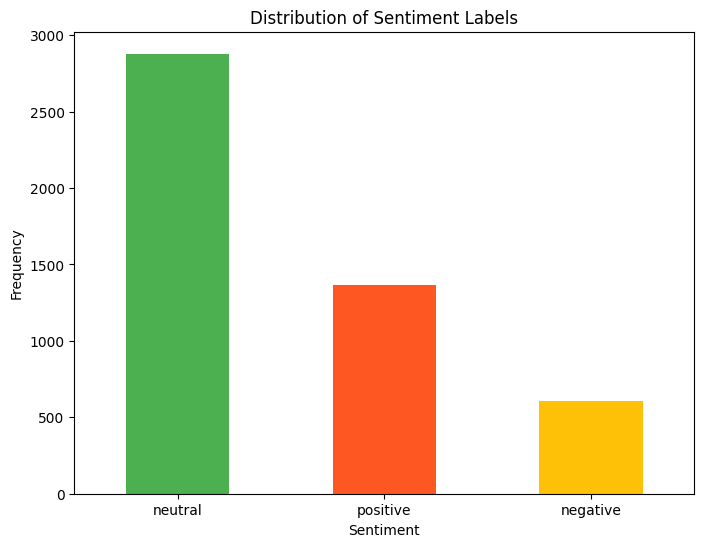

In [25]:
# Visualization of sentiment distribution
plt.figure(figsize=(8,6))
df["sentiment"].value_counts().plot(kind="bar", color=['#4CAF50', '#FF5722', '#FFC107'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [26]:
# text data exploration
# adding another column for text length 
df2["length"] = df2["text"].apply(len)
print(df2.head())

  sentiment                                               text  length
0   neutral  According to Gran , the company has no plans t...     127
1   neutral  Technopolis plans to develop in stages an area...     190
2  negative  The international electronic industry company ...     228
3  positive  With the new production plant the company woul...     206
4  positive  According to the company 's updated strategy f...     203


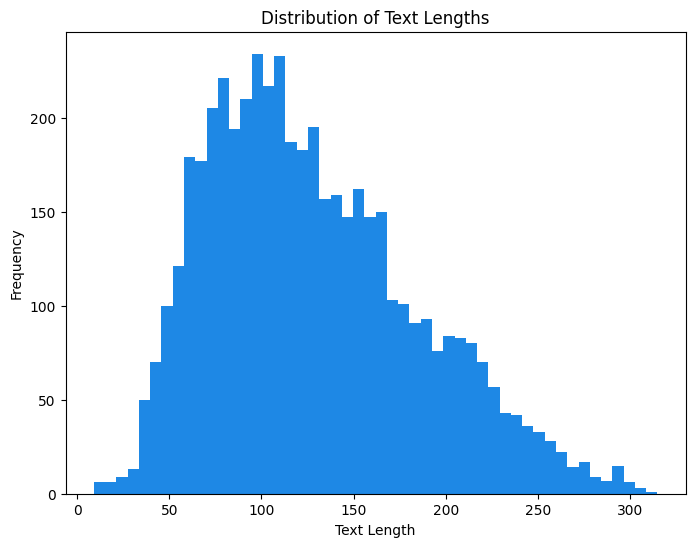

In [27]:
# Visualize text length distribution
plt.figure(figsize=(8, 6))
plt.hist(df2["length"], bins=50, color='#1E88E5')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

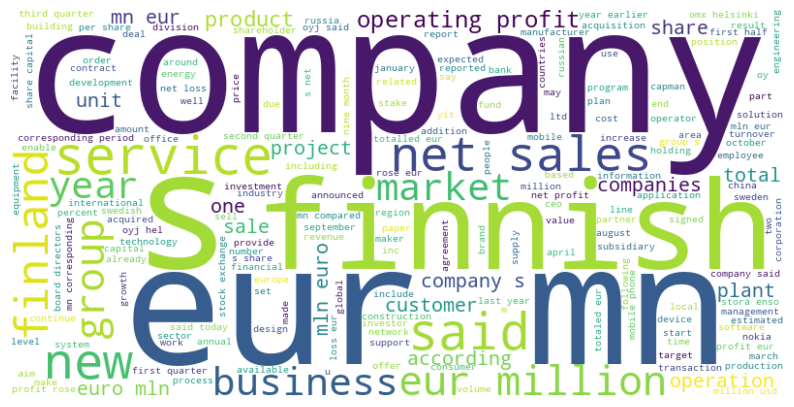

In [28]:
# checking most common words

# Remove stopwords
stop_words = set(stopwords.words('english'))
words = ' '.join(df['text']).lower().split()
filtered_words = [word for word in words if word not in stop_words]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# checking for duplicates 
print(df2.duplicated().sum())
# there are not duplicates soo no need to remove them

# checking for outliers
print(df2["length"].describe())

6
count    4846.000000
mean      128.132068
std        56.526180
min         9.000000
25%        84.000000
50%       119.000000
75%       163.000000
max       315.000000
Name: length, dtype: float64


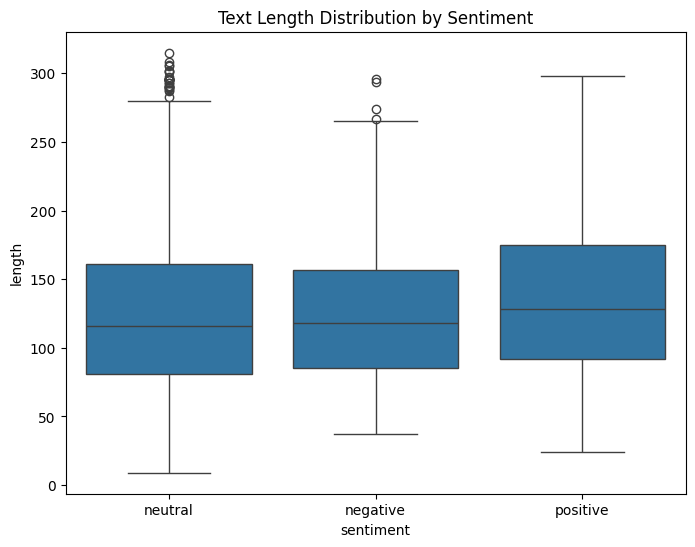

In [32]:
# Checking sentiment distribution by length
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='length', data=df2)
plt.title('Text Length Distribution by Sentiment')
plt.show()